In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
import os
import random
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory with our training covid pictures
train_covid_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/train/covid')

# Directory with our training normal pictures
train_normal_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/train/normal')

train_covid_names_61 = os.listdir(train_covid_dir)
train_covid_names = train_covid_names_61[:60]
print(train_covid_names[:5])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:5])

print('total training covid images:', len(os.listdir(train_covid_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))

random.shuffle(train_covid_names)
random.shuffle(train_normal_names)

print('total training covid images:', len(os.listdir(train_covid_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))


print('total training covid images:', len(train_covid_names))
print('total training normal images:', len(train_normal_names))
print(train_covid_names[59])

['covid9.jpeg', 'covid11.jpeg', 'covid43.jpeg', 'covid44.jpeg', 'covid34.jpeg']
['normal29.jpeg', 'normal58.jpeg', 'normal43.jpeg', 'normal62.jpeg', 'normal1.jpeg']
total training covid images: 61
total training normal images: 70
total training covid images: 61
total training normal images: 70
total training covid images: 60
total training normal images: 70
covid19.jpeg


In [14]:
# Directory with our training covid pictures
test_covid_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/test/covid')

# Directory with our training normal pictures
test_normal_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/test/normal')

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:5])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:5])

print('total testing covid images:', len(os.listdir(test_covid_dir)))
print('total testing normal images:', len(os.listdir(test_normal_dir)))

['nejmoa2001191_f3-PA.jpeg', 'nejmoa2001191_f5-PA.jpeg', 'ryct.2020200034.fig2.jpeg', 'ryct.2020200034.fig5-day7.jpeg', 'ryct.2020200034.fig5-day4.jpeg']
['NORMAL2-IM-1412-0001.jpeg', 'NORMAL2-IM-1401-0001.jpeg', 'NORMAL2-IM-1423-0001.jpeg', 'NORMAL2-IM-1406-0001.jpeg', 'NORMAL2-IM-1396-0001.jpeg']
total testing covid images: 9
total testing normal images: 9


In [0]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# train_covid_names.sort()

# for fn in train_covid_names:
  
#   img_path = os.path.join(train_covid_dir, fn)
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.title(fn)

#   plt.show()

In [0]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [18]:
TRAINING_DIR = '/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/train'
#YOUR CODE HERE
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
#YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 
#YOUR CODE HERE

VALIDATION_DIR = '/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/test'
#YOUR CODE HERE
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
#YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=9,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [22]:
history = model.fit(train_generator,
                              epochs=10,
                              steps_per_epoch = 6,
                              verbose=1,
                              validation_data=validation_generator,
                              validation_steps = 2  )

Epoch 1/10
6/6 [==============================] - 3s 454ms/step - loss: 0.1903 - acc: 0.9500 - val_loss: 0.0294 - val_acc: 1.0000
Epoch 2/10
6/6 [==============================] - 2s 392ms/step - loss: 0.1743 - acc: 0.9333 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 3/10
6/6 [==============================] - 2s 408ms/step - loss: 0.1918 - acc: 0.9500 - val_loss: 0.0165 - val_acc: 1.0000
Epoch 4/10
6/6 [==============================] - 3s 439ms/step - loss: 0.0818 - acc: 0.9500 - val_loss: 0.0461 - val_acc: 1.0000
Epoch 5/10
6/6 [==============================] - 2s 380ms/step - loss: 2.3519 - acc: 0.7833 - val_loss: 0.0497 - val_acc: 1.0000
Epoch 6/10
6/6 [==============================] - 2s 407ms/step - loss: 0.0936 - acc: 0.9833 - val_loss: 0.0158 - val_acc: 1.0000
Epoch 7/10
6/6 [==============================] - 2s 401ms/step - loss: 0.0714 - acc: 0.9833 - val_loss: 0.0156 - val_acc: 1.0000
Epoch 8/10
6/6 [==============================] - 3s 424ms/step - loss: 0.0684 - acc: 0.98

Text(0.5, 1.0, 'Training and validation loss')

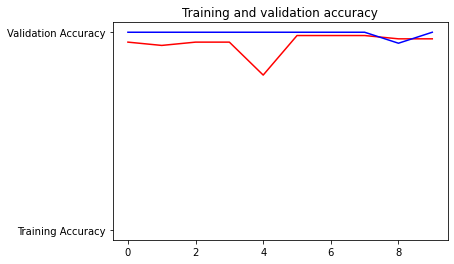

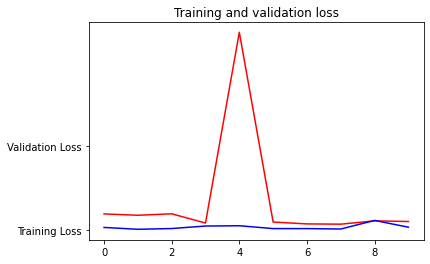

In [23]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a normal")
  else:
    print(fn + " is a covid")

Saving 91244987_707873753286938_7973220156362981376_n.jpg to 91244987_707873753286938_7973220156362981376_n.jpg
[1.2824789e-37]
91244987_707873753286938_7973220156362981376_n.jpg is a covid
